# Driver distraction using Convolutional Neural Networks

### Libraries

In [1]:
import os
from os.path import join
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

### Model

In [2]:
cnnmodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
cnnmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnnmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 49, 49, 64)        2

### Data preprocessing

In [3]:
workingdir = os.path.abspath('')
trainingdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/train/')

### Train and validation dataset split

In [4]:
trainingdataimage = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, 
                                       height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                                       horizontal_flip = True, fill_mode = 'nearest', validation_split = 0.2)
trainingset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'training', shuffle = True)
validationset = trainingdataimage.flow_from_directory(trainingdirectory, 
                                                            target_size = (100, 100), batch_size = 64, 
                                                            class_mode = 'categorical', subset = 'validation', shuffle = True)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


### Model fit

In [5]:
history =  cnnmodel.fit(trainingset, epochs = 20, steps_per_epoch = len(trainingset), 
                             validation_data = validationset, verbose = 1, validation_steps = len(validationset))

Epoch 1/20
281/281 [==============================] - 121s 415ms/step - loss: 2.4891 - accuracy: 0.1519 - val_loss: 5.3542 - val_accuracy: 0.1031
Epoch 2/20
281/281 [==============================] - 115s 409ms/step - loss: 1.8611 - accuracy: 0.3040 - val_loss: 2.3018 - val_accuracy: 0.2118
Epoch 3/20
281/281 [==============================] - 115s 410ms/step - loss: 1.4531 - accuracy: 0.4581 - val_loss: 1.4161 - val_accuracy: 0.4919
Epoch 4/20
281/281 [==============================] - 113s 403ms/step - loss: 1.1842 - accuracy: 0.5686 - val_loss: 1.4268 - val_accuracy: 0.4992
Epoch 5/20
281/281 [==============================] - 113s 401ms/step - loss: 0.9590 - accuracy: 0.6610 - val_loss: 1.0059 - val_accuracy: 0.6583
Epoch 6/20
281/281 [==============================] - 113s 403ms/step - loss: 0.7818 - accuracy: 0.7309 - val_loss: 0.9718 - val_accuracy: 0.6722
Epoch 7/20
281/281 [==============================] - 114s 405ms/step - loss: 0.6644 - accuracy: 0.7718 - val_loss: 0.8809 -

### Plot to show training accuracy vs validation accuracy

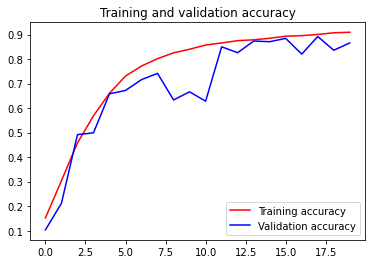

<Figure size 432x288 with 0 Axes>

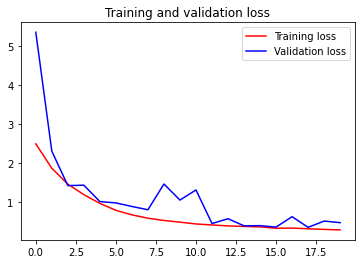

<Figure size 432x288 with 0 Axes>

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

### Test data prediction

In [7]:
testparentdirectory = os.path.join(workingdir + '/state-farm-distracted-driver-detection/imgs/')
testdataimage = ImageDataGenerator(rescale = 1./255)
testdata = testdataimage.flow_from_directory(testparentdirectory, classes=['test'], target_size = (100,100))
testoutput = cnnmodel.predict(testdata, verbose = 1)

Found 79726 images belonging to 1 classes.
2492/2492 [==============================] - 391s 157ms/step


### Preparing output file

In [8]:
specimencsv = pd.read_csv(os.path.join(workingdir + '/state-farm-distracted-driver-detection/sample_submission.csv'))
result = {'img':list(specimencsv.values[:,0]),}
for value in range(0,10):
    result['c' + str(value)] = list(testoutput[:,value])

In [9]:
testoutput = pd.DataFrame(result)
testoutput.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,3.211677e-03,2.253305e-04,2.706290e-05,3.837896e-04,8.444262e-04,3.112747e-02,3.217655e-04,7.533603e-03,1.627765e-01,7.935484e-01
1,img_10.jpg,9.579306e-03,1.249673e-05,7.653095e-05,2.879370e-02,7.807218e-01,1.140907e-01,7.712898e-04,2.398459e-04,2.378620e-02,4.192819e-02
2,img_100.jpg,1.477287e-04,1.068845e-01,8.859293e-01,2.756896e-07,8.835165e-08,1.400013e-07,3.113528e-03,9.908845e-04,8.339800e-04,2.099437e-03
3,img_1000.jpg,2.282440e-22,1.180335e-23,4.059517e-26,1.906144e-19,3.026286e-26,1.000000e+00,1.464939e-22,5.956021e-19,3.098776e-17,1.986643e-17
4,img_100000.jpg,1.691018e-04,1.174124e-07,2.573739e-07,3.437204e-04,2.252719e-05,9.963211e-01,1.580590e-06,3.917137e-05,6.144463e-04,2.487912e-03
